# Actividad 3: CNN classifier for cats_and_dogs_small dataset
## Gerardo Villegas Contreras; A00571388
## 27/10/2022

In [1]:
#PACKAGE IMPORTS
# Import all required packages.
# tensorflow , panda, numpy, matplotlib.pyplot
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
import random
import os

# If you would like to make further imports from Tensorflow, add them here
#form keras import Sequential, Dense, Flatten, Conv2D, MaxPooling2D

from keras import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D,Resizing, Rescaling,RandomFlip,RandomRotation

physical_devices = tf.config.list_physical_devices("GPU")
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [3]:
path='Small Img'
df=pd.read_csv('class_df.csv')
df['filename'] = df['filename'].apply(lambda x: f"{path}/{x.split('/')[5]}")
df

,filename,usable
0,Small Img/StateLineWeir_20170122_Farrell_908.jpg,0
1,Small Img/StateLineWeir_20170112_Farrell_637.jpg,0
2,Small Img/StateLineWeir_20161227_Farrell_178.jpg,1
3,Small Img/StateLineWeir_20161231_Farrell_279.jpg,0
4,Small Img/StateLineWeir_20170117_Farrell_750.jpg,0
...,...,...
55798,Small Img/StateLineWeir_20160313_Farrell_747.JPG,0
55799,Small Img/StateLineWeir_20160104_Farrell_310.JPG,1
55800,Small Img/StateLineWeir_20160104_Farrell_306.JPG,1
55801,Small Img/StateLineWeir_20160220_Farrell_599.JPG,1


In [4]:
df['usable'].value_counts()

1    42059
0    13744
Name: usable, dtype: int64

In [5]:
zeroes_subset = df.loc[df["usable"] == 0, :]
number_of_0s = len(zeroes_subset)

print(number_of_0s)
ones_subset = df.loc[df["usable"] == 1, :]
sampled_ones = ones_subset.sample(number_of_0s)

print(sampled_ones)

clean_df = pd.concat([zeroes_subset, sampled_ones], ignore_index=True)

print(clean_df)

13744
                                               filename  usable
32271  Small Img/StateLineWeir_20130408_Farrell_612.JPG       1
44310  Small Img/StateLineWeir_20180719_Farrell_431.jpg       1
13074  Small Img/StateLineWeir_20190604_Farrell_489.jpg       1
30017  Small Img/StateLineWeir_20171219_Farrell_079.jpg       1
2503   Small Img/StateLineWeir_20180701_Farrell_886.jpg       1
...                                                 ...     ...
17808  Small Img/StateLineWeir_20160807_Farrell_180.jpg       1
41126  Small Img/StateLineWeir_20170421_Farrell_349.jpg       1
29919  Small Img/StateLineWeir_20180105_Farrell_579.jpg       1
36486  Small Img/StateLineWeir_20161004_Farrell_850.jpg       1
2147   Small Img/StateLineWeir_20180619_Farrell_525.jpg       1

[13744 rows x 2 columns]
                                               filename  usable
0      Small Img/StateLineWeir_20170122_Farrell_908.jpg       0
1      Small Img/StateLineWeir_20170112_Farrell_637.jpg       0
2      S

In [6]:
df=clean_df
df['usable']=df['usable'].astype(str)
df

,filename,usable
0,Small Img/StateLineWeir_20170122_Farrell_908.jpg,0
1,Small Img/StateLineWeir_20170112_Farrell_637.jpg,0
2,Small Img/StateLineWeir_20161231_Farrell_279.jpg,0
3,Small Img/StateLineWeir_20170117_Farrell_750.jpg,0
4,Small Img/StateLineWeir_20170109_Farrell_552.jpg,0
...,...,...
27483,Small Img/StateLineWeir_20160807_Farrell_180.jpg,1
27484,Small Img/StateLineWeir_20170421_Farrell_349.jpg,1
27485,Small Img/StateLineWeir_20180105_Farrell_579.jpg,1
27486,Small Img/StateLineWeir_20161004_Farrell_850.jpg,1


In [7]:
train, test = train_test_split(df, test_size=0.2)

In [8]:
IMAGE_WIDTH=150
IMAGE_HEIGHT=150
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3
batch_size=64
epochs=30

In [9]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_dataframe(
    train, 
    x_col='filename',
    y_col='usable',
    class_mode='binary',
    target_size=IMAGE_SIZE,
    batch_size=batch_size,
    subset='training'
)

Found 17584 validated image filenames belonging to 2 classes.


c:\Users\wawer\anaconda3\envs\tf_2.11\lib\site-packages\keras\preprocessing\image.py:1139: UserWarning: Found 11 invalid image filename(s) in x_col="filename". These filename(s) will be ignored.
  warnings.warn(


In [10]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_dataframe(
    test,
    x_col='filename',
    y_col='usable',
    target_size=IMAGE_SIZE,
    class_mode='binary',
    batch_size=batch_size
)

Found 5494 validated image filenames belonging to 2 classes.


c:\Users\wawer\anaconda3\envs\tf_2.11\lib\site-packages\keras\preprocessing\image.py:1139: UserWarning: Found 4 invalid image filename(s) in x_col="filename". These filename(s) will be ignored.
  warnings.warn(


In [11]:
validation_generator = train_datagen.flow_from_dataframe(
    train,
    x_col='filename',
    y_col='usable',
    target_size=IMAGE_SIZE,
    class_mode='binary',
    batch_size=batch_size,
    subset='validation'
)

Found 4395 validated image filenames belonging to 2 classes.


c:\Users\wawer\anaconda3\envs\tf_2.11\lib\site-packages\keras\preprocessing\image.py:1139: UserWarning: Found 11 invalid image filename(s) in x_col="filename". These filename(s) will be ignored.
  warnings.warn(


### Modelo normal

Definimos nuestro modelo con una capa convolucional con 32 filtros, un tamaño de kernel de 3x3, una función de activación relu y strides normales con 0 padding.

Después agregamos una capa de MaxPooling 2x2, luego una capa flatten, tres capas consecutivas con relu y 128 salidas la primera y tercera y, la segunda 256 y finalmente una softmax con las 10 clases como salidas.

In [12]:
def create_my_model(s,M,n,l):
    

    model = Sequential()
    model.add(Conv2D(n, kernel_size=(M, M), activation='relu', input_shape=s,padding='same'))
    model.add(MaxPooling2D(pool_size=(l, l)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    return model

De nuestro modelo obtenemos 406,602 parámetros, de los cuales todos son entrenables debido a que no se definieron otros, donde obtenemos 320 de la capa convolucional, 401472 de la primer capa densa, 4160 de la segunda y 650 de la de salida.

In [13]:
# run your function model
size=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)
model=create_my_model(size,3,32,2)
model.compile(loss="binary_crossentropy", metrics=['accuracy'], optimizer='Adam')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 180000)            0         
                                                                 
 dense (Dense)               (None, 128)               23040128  
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                        

Hacemos el fitting del modelo con un batch size de 32 y 5 épocas

In [14]:
earlystop = EarlyStopping(patience=4)

In [15]:
history = model.fit(
    train_generator, 
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=1000//batch_size,
    steps_per_epoch=2000//batch_size,
    callbacks=[earlystop],
    verbose=1
)

Epoch 1/10
62/62 [==============================] - 24s 317ms/step - loss: 0.5836 - accuracy: 0.8826 - val_loss: 0.1219 - val_accuracy: 0.9607
Epoch 2/10
62/62 [==============================] - 18s 285ms/step - loss: 0.0915 - accuracy: 0.9677 - val_loss: 0.0484 - val_accuracy: 0.9778
Epoch 3/10
62/62 [==============================] - 16s 250ms/step - loss: 0.0701 - accuracy: 0.9743 - val_loss: 0.0556 - val_accuracy: 0.9778
Epoch 4/10
62/62 [==============================] - 16s 253ms/step - loss: 0.0690 - accuracy: 0.9743 - val_loss: 0.0440 - val_accuracy: 0.9819
Epoch 5/10
62/62 [==============================] - 15s 239ms/step - loss: 0.0609 - accuracy: 0.9787 - val_loss: 0.0498 - val_accuracy: 0.9758
Epoch 6/10
62/62 [==============================] - 14s 219ms/step - loss: 0.0625 - accuracy: 0.9773 - val_loss: 0.0326 - val_accuracy: 0.9879
Epoch 7/10
62/62 [==============================] - 14s 224ms/step - loss: 0.0547 - accuracy: 0.9792 - val_loss: 0.0346 - val_accuracy: 0.9859

       loss  accuracy  val_loss  val_accuracy
0  0.583624  0.882622  0.121876      0.960685
1  0.091538  0.967742  0.048411      0.977823
2  0.070147  0.974294  0.055578      0.977823
3  0.068970  0.974294  0.043959      0.981855
4  0.060889  0.978659  0.049789      0.975806
5  0.062542  0.977319  0.032627      0.987903
6  0.054702  0.979167  0.034641      0.985887
7  0.049065  0.981351  0.038968      0.986895
8  0.050473  0.979335  0.041722      0.981855
9  0.049349  0.983871  0.041377      0.987903 



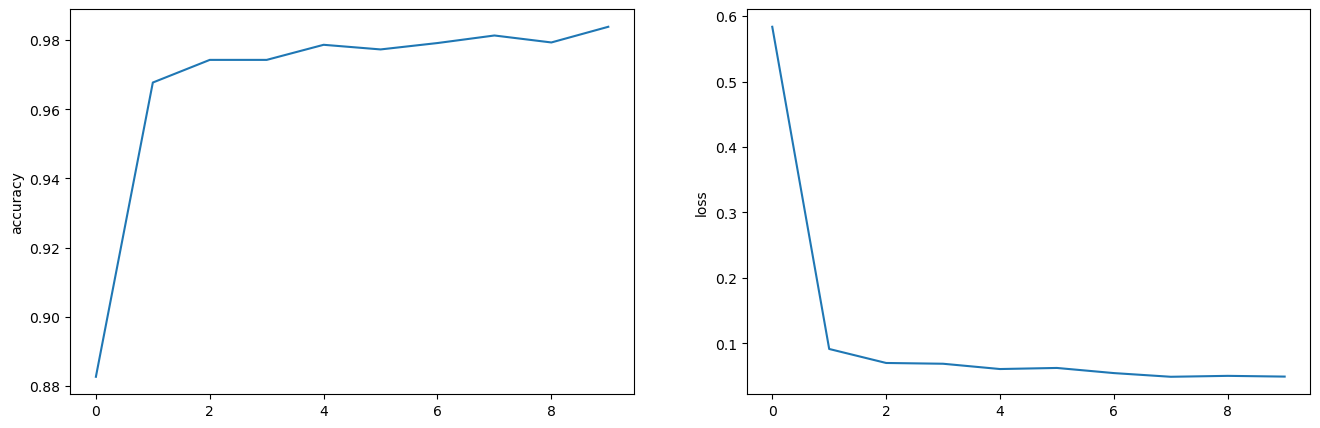



Evaluation:

172/172 [==============================] - 36s 211ms/step - loss: 0.0444 - accuracy: 0.9838
Loss: 0.04435858502984047
Accuracy: 0.9838005304336548


In [16]:
hist_df = pd.DataFrame(history.history) 
print(hist_df,'\n')
# Run to make the Accuracy vs Epochs plot
fig, axes = plt.subplots(1, 2, figsize=(16, 5))
sns.lineplot(ax=axes[0],data=hist_df, x=hist_df.index, y="accuracy")
sns.lineplot(ax=axes[1],data=hist_df, x=hist_df.index, y="loss")
plt.show()

print('\n\nEvaluation:\n')
score=model.evaluate(test_generator, batch_size=batch_size)
print(f'Loss: {score[0]}\nAccuracy: {score[1]}')

nres=(tuple(hist_df.iloc[-1,:2]),score)

In [17]:
model.save('Classifier')

INFO:tensorflow:Assets written to: Classifier\assets


INFO:tensorflow:Assets written to: Classifier\assets
